In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

In [5]:
# Las funcioes links coupleds atomics calcula la cantidad de links coupleds atomics correspondientes a un modelo test
# generado por test/utilities/generate_sbml.py para un tamaño de n reacciones
def links(n):
    groups = ceil((float(n) / 150.0))
    return 6 + 5*2 + 16 + 3 * (groups * 3 + 1) + 2 * (groups * 5 + 1) + (groups * 4 + 1) + 6 * n

def coupleds(n):
    groups = ceil(float(n) / 150)
    return 1 + 3 + 2 * (1 + groups) + 4 + 4 * groups

def atomics(n):
    groups = ceil(float(n) / 150)
    return 3 + 6 + 6 * groups + 6 * n

# remoueve todas las lineas en blanco que tienen el symbolo \r como separador
def remove_empty_lines(path):                  
    f = open(path, 'r')
    a = f.readlines()[0].split('\r')
    a = [l for l in a if l != '']
    f2 = open(path + '.cropted', 'w')
    f2.write('\n'.join(a))
    f2.close()
    f.close()

In [10]:
df = pd.read_csv('../results_compile/result.csv', sep=';')
df['ram_gb'] = df.apply(lambda x: x['ram_kb'] / 1000000.0, axis=1)
df['atomics'] = df.apply(lambda x: atomics(x['reactions']), axis=1)
df['links'] = df.apply(lambda x: links(x['reactions']), axis=1)
df['coupleds'] = df.apply(lambda x: coupleds(x['reactions']), axis=1)

df_compile = df[df['process'] == 'compile']
df_link = df[df['process'] == 'link']

df.head()

,reactions,process,time_seconds,ram_kb,ram_gb,atomics,links,coupleds
0,1,compile,45.59,2062104,2.062104,21.0,67.0,16.0
1,3,compile,43.67,2073976,2.073976,33.0,79.0,16.0
2,5,compile,43.44,2086700,2.086700,45.0,91.0,16.0
3,7,compile,43.76,2101724,2.101724,57.0,103.0,16.0
4,9,compile,44.36,2116352,2.116352,69.0,115.0,16.0


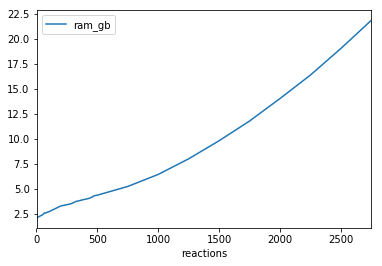

In [12]:
#sns.barplot(x='reaction_amout', y='ram_gb', data=df)
df_compile.plot(x='reactions', y='ram_gb')
plt.show()

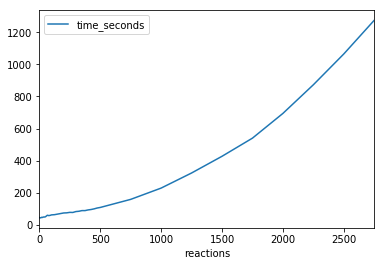

In [15]:
df_compile.plot(x='reactions', y='time_seconds')
plt.show()

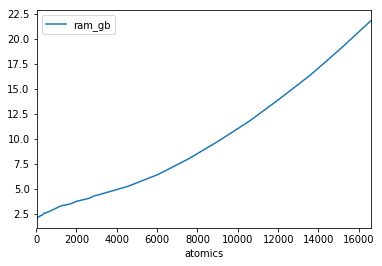

In [16]:
df_compile.plot(x='atomics', y='ram_gb')
plt.show()

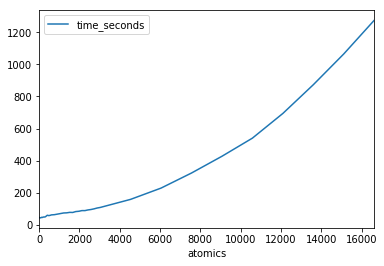

In [17]:
df_compile.plot(x='atomics', y='time_seconds')
plt.show()

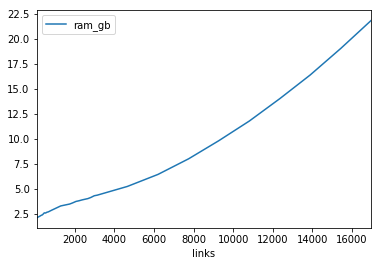

In [18]:
df_compile.plot(x='links', y='ram_gb')
plt.show()

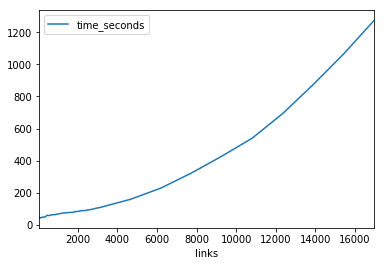

In [19]:
df_compile.plot(x='links', y='time_seconds')
plt.show()

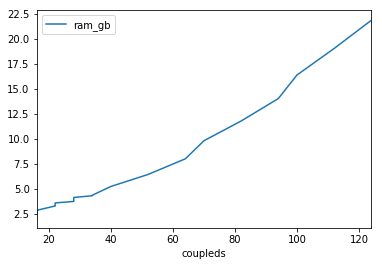

In [20]:
df_compile.plot(x='coupleds', y='ram_gb')
plt.show()

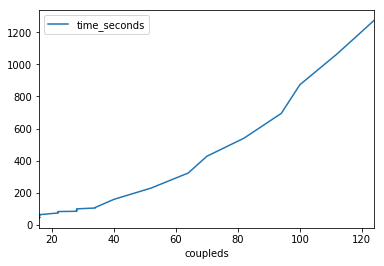

In [21]:
df_compile.plot(x='coupleds', y='time_seconds')
plt.show()

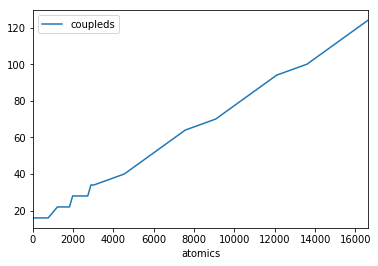

In [22]:
df_compile.plot(x='atomics', y='coupleds')
plt.show()

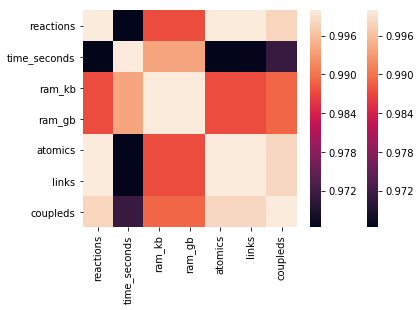

In [26]:
corr = df_compile.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()